In [1]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm

# set up custom colormap functions

def colormap_gyr(i, n):
    irev = n-1-i

    return (
      '#' +
      '{:02x}'.format(
             255 if irev <= n // 2 else
             0   if irev >= n      else
             ( 2 * 255 * ( n - 1 - irev ) ) // ( n )) +
      '{:02x}'.format(
             0   if irev <= 0      else
             255 if irev >= n // 2 else
             ( 255 * ( 2 * irev ) ) // n) +
      '00')

def colormap_gray(i, n):
    irev = n-1-i
    v = (255 * irev) // n
    v = ((256-32)*v) // 256
    v = 0 if v < 0 else 255 if v > 255 else v
    result = '#' + '{:02x}'.format(v) + '{:02x}'.format(v) + '{:02x}'.format(v)
    return result

def colormap(i, n):
    v1 = colormap_gyr(i, n)
    v2 = colormap_gray(i, n)
    v1r = int(v1[1:3], 16)
    v1g = int(v1[3:5], 16)
    v1b = int(v1[5:7], 16)
    v2r = int(v2[1:3], 16)
    v2g = int(v2[3:5], 16)
    v2b = int(v2[5:7], 16)
    return (
      '#' +
      '{:02x}'.format(
        (4*v1r + 0*v2r) // 4
      ) +
      '{:02x}'.format(
        (4*v1g + 0*v2g) // 4
      ) +
      '{:02x}'.format(
        (4*v1b + 0*v2b) // 4
      )
    )

In [30]:
if False: # Peak
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/runs12/src/out.csv'
    indm, indk, indv, indf = 0, 1, 2, 4
    #mmax, kmax = 100000, 100000000
    mmax, kmax = 40000, 1000000
    check_f = False
    trials = 1
    kmod=1
    mmod=8
    pointsize=1
    
if False: # BSD-A100 runs12
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/runs12-bsd/out.csv'
    indm, indk, indv, indf = 0, 1, 2, 4
    #mmax, kmax = 100000, 100000000
    mmax, kmax = 100000, 2000000
    check_f = False
    trials = 6
    kmod=1
    mmod=32
    pointsize=10
    
if False: # BSD-A100 runs10
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/runs10-bsd/out.csv'
    indm, indk, indv, indf = 0, 1, 2, 4
    #mmax, kmax = 100000, 100000000
    mmax, kmax = 100000, 2000000
    check_f = False
    trials = 1
    kmod=1
    mmod=8
    pointsize=1
    mmod=32
    pointsize=4
    
if True: # Spock
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/runs12-spock4.2/src/out.csv'
    indm, indk, indv, indf = 0, 1, 2, 4
    #mmax, kmax = 100000, 100000000
    mmax, kmax = 40000, 1000000
    check_f = True
    trials = 2
    kmod=1
    mmod = 1
    pointsize=1
    
if False: # Iris
    infile = '/gpfs/alpine/gen006/proj-shared/joubert/runs12-iris/out.csv'
    indm, indk, indv, indf = 0, 1, 2, 4
    #mmax, kmax = 100000, 100000000
    mmax, kmax = 100000, 1000000
    check_f = False
    trials = 2
    kmod=1
    mmod=2
    pointsize=5
    

In [31]:
#--------------------
# Acquire csv file.
#--------------------
import csv
#csvfile = open('/gpfs/alpine/gen006/proj-shared/joubert/runs12-bsd/outs-runs12-bsd-snapshot-2021-07-27.txt', newline='')
#csvfile = open('/gpfs/alpine/gen006/proj-shared/joubert/runs10-iris/out1.txt', newline='')
#csvfile = open('/gpfs/alpine/gen006/proj-shared/joubert/runs10-bsd/outs-1trial.txt', newline='')
csvfile = open(infile, newline='')
csvdata = list(csv.reader(csvfile, delimiter='\t', quotechar='|'))

In [32]:
#--------------------
# Parse csv file
#--------------------
csvdata1 = [v for v in csvdata if int(v[indm]) < mmax and int(v[indk]) < kmax and int(v[indm]) % mmod == 0 and int(v[indk]) % kmod == 0]
#csvdata1 = [v for v in csvdata if int(v[indm]) < 40000 and int(v[indk]) < 2000000 and int(v[indm])%64 == 0]
#csvdata1 = [v for v in csvdata if int(v[indm]) < 10000 and int(v[indk]) < 500000 and int(v[indm])%1 == 0 and int(v[indk])%2 == 0]
#csvdata1 = [v for v in csvdata if int(v[0]) < 30000 and int(v[1]) < 2000000]
#csvdata1 = [r for r in csvdata]
#x = [int(r[indm]) for r in csvdata1]
#y = [int(r[indk]) for r in csvdata1]
#v = [int(float(r[indv] if not check_f or int(r[indf]) == 0 else 0)*1e12) for r in csvdata1]
#f = [0 if not check_f else int(r[indf]) for r in csvdata1]

x, y, v, f = [], [], [], []

for i in range(len(csvdata1)):
    if i < trials-1: continue
    have_all_trials = True
    for j in range(trials):
        have_all_trials = have_all_trials and csvdata1[i-j][indm] == csvdata1[i][indm] and csvdata1[i-j][indk] == csvdata1[i][indk]
    if not have_all_trials: continue
    #if trials == 2 and not (csvdata1[i-1][indm] == csvdata1[i][indm] and csvdata1[i-1][indk] == csvdata1[i][indk]): continue
    valuebest = 0
    ibest = i
    for j in range(trials):
        r = csvdata1[i-j]
        fi = int(r[indf]) if check_f else 0
        value = int(float(r[indv])*1e12) if fi == 0 else 0
        if value > valuebest:
            ibest = i - j
            valuebest = value
    r = csvdata1[ibest]
    fi = int(r[indf]) if check_f else 0
    if fi != 0: continue
    #if fi == 0: continue
    x.append(int(r[indm]))
    y.append(int(r[indk]))
    v.append(int(float(r[indv])*1e12) if fi == 0 else 0)
    f.append(fi)
print(len(v))

547107


165.415


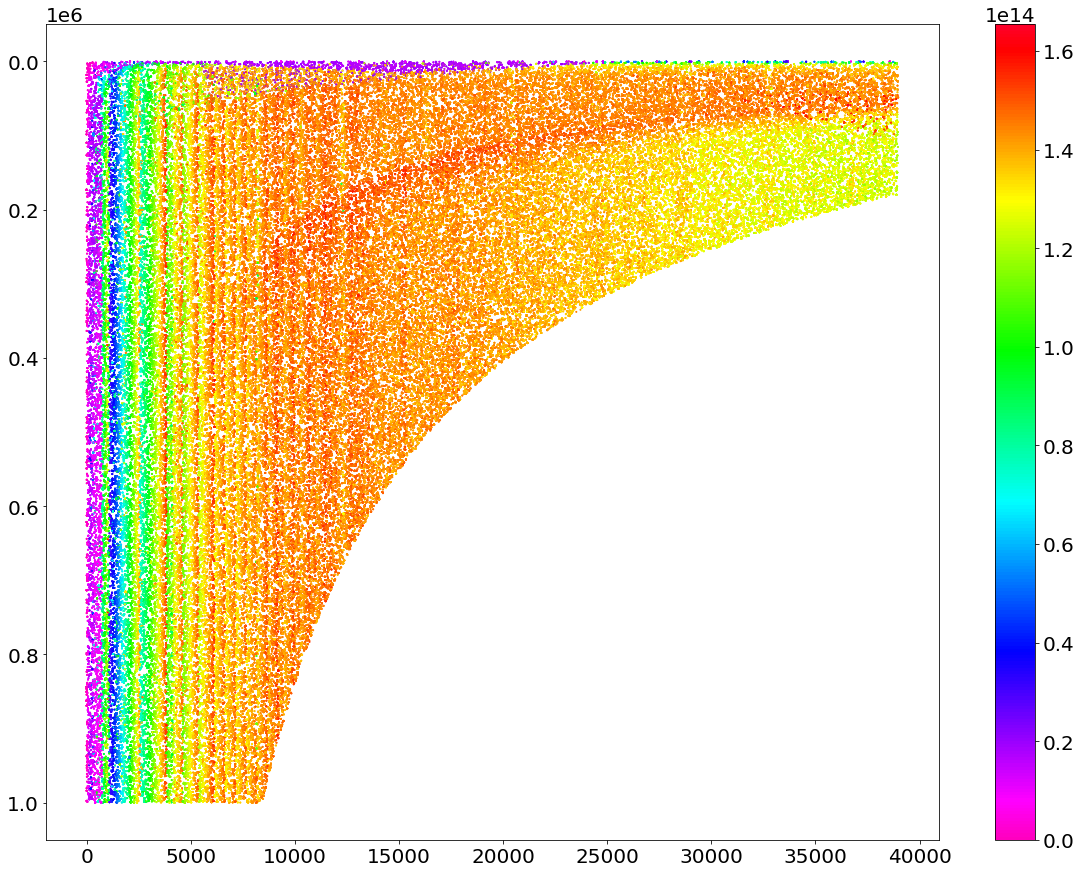

In [35]:
#--------------------
# Make plot
#--------------------
mv = max(v)
vcolor = [colormap_gyr(v[i], mv) if f[i] == 0 else "#000000" for i in range(len(v))]
print(mv/1e12)
v2 = [vi / (1.*mv) for vi in v]

plt.rcParams["figure.figsize"] = (20, 15)
#bgcolor = '#999999' # gray
bgcolor = '#ffffff' # white
plt.rcParams['axes.facecolor'] = bgcolor
plt.rcParams.update({'font.size': 20})
plt.gca().invert_yaxis()

cm = matplotlib.colors.ListedColormap([
  (int(colormap(i,255)[1:3], 16)/255.,
   int(colormap(i,255)[3:5], 16)/255.,
   int(colormap(i,255)[5:7], 16)/255., 1.) for i in range(256)])

# See https://matplotlib.org/stable/tutorials/colors/colormaps.html
#sc = plt.scatter(x, y, s=1, c=vcolor)
#plt.set_cmap('plasma')
sc = plt.scatter(x, y, s=pointsize, c=v, cmap='gist_rainbow_r') # YlOrRd # gnuplot_r # rainbow # gist_rainbow_r
#sc = plt.scatter(x, y, s=1, cmap=cm.get_cmap('plasma'))
plt.colorbar(sc)
#plt.set_cmap('plasma')

plt.show()
